In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
if os.name=='nt':
    font_family="Malgun Gothic"
else:
    font_family="AppleGothic"
    
sns.set(font=font_family,rc={"axes.unicode_minus":False})

In [2]:
from sklearn.datasets import load_iris
iris=load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
df=pd.DataFrame(iris.data, columns=iris.feature_names)

df['target']=iris.target

df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


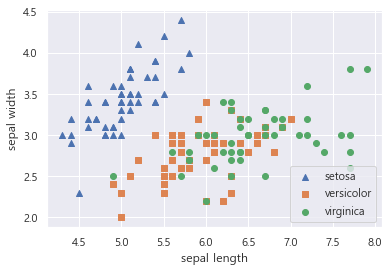

In [5]:
markers=['^','s','o']

for i, marker in enumerate(markers):
    x_axis_data=df[df['target']==i]['sepal length (cm)']
    y_axis_data=df[df['target']==i]['sepal width (cm)']
    plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler

iris_scaled=StandardScaler().fit_transform(df.iloc[:,:-1])

In [7]:
pca=PCA(n_components=2)

pca.fit(iris_scaled)
iris_pca=pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [8]:
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca=pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(5)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

In [10]:
rcf=RandomForestClassifier(random_state=156)
scores=cross_val_score(rcf,iris.data,iris.target,scoring='accuracy',cv=3)
print("원본 데이터 교차 검증 정확도:",scores)
print("원본 데이터 교차 검증 평균 정확도:",np.mean(scores))

원본 데이터 교차 검증 정확도: [0.98 0.94 0.96]
원본 데이터 교차 검증 평균 정확도: 0.96


In [11]:
pca_X=irisDF_pca[['pca_component_1','pca_component_2']]
scores_pca=cross_val_score(rcf,pca_X,iris.target,scoring='accuracy',cv=3)
print("PCA 데이터 교차 검증 정확도:",scores_pca)
print("PCA 데이터 교차 검증 평균 정확도:",np.mean(scores_pca))

PCA 데이터 교차 검증 정확도: [0.88 0.88 0.88]
PCA 데이터 교차 검증 평균 정확도: 0.88


In [12]:
print(df.columns)
df.head()

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
train_df=df[['sepal length (cm)','sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]

tsne_np=TSNE(n_components=2).fit_transform(train_df)

tsne_df=pd.DataFrame(tsne_np,columns=['component 0','component 1'])

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [14]:
tsne_df.head()

,component 0,component 1
0,14.455201,-20.106903
1,17.023108,-20.707323
2,16.989845,-19.546680
3,17.392210,-19.853546
4,14.377646,-19.656097


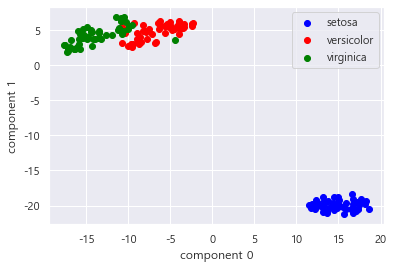

In [15]:
tsne_df['target']=df['target']

tsne_df_0=tsne_df[tsne_df['target']==0]
tsne_df_1=tsne_df[tsne_df['target']==1]
tsne_df_2=tsne_df[tsne_df['target']==2]

plt.scatter(tsne_df_0['component 0'],tsne_df_0['component 1'],color='blue',label='setosa')
plt.scatter(tsne_df_1['component 0'],tsne_df_1['component 1'],color='red',label='versicolor')
plt.scatter(tsne_df_2['component 0'],tsne_df_2['component 1'],color='green',label='virginica')

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()